# **FICO Analytic Challenge © Fair Isaac 2024**

# Week 6: Neural Networks: Training and Evaluation

### Neural Network vs Logistic Regression

Last week you learned about Logistic Regression, which is a linear machine learning algorithm. This week we're looking at neural networks (NNets), a more sophisticated machine learning algorithm.

As you learned from last weeks material, Logistic Regression assumes a linear relationship between the input features and the output. This means that it cannot capture the complexity and non-linearity of the data. Another drawback is that it is sensitive to outliers and noise, which can affect the accuracy and stability of the model. Logistic regression also has a limited capacity to learn from multiple features, as it can only combine them linearly.

Neural network is a type of non-linear model that mimics the structure and function of the human brain. It consists of layers of nodes, also called neurons, that are connected by weights. The input layer receives the input features, and the output layer produces the output. Between them, there are hidden layers that perform computations and transformations on the data. Neural network uses a non-linear activation function to introduce non-linearity and flexibility to the model. Below are some pro's and con's of a neural network.

Pros:
- Can handle non-linear data better, as it can learn complex and non-linear patterns and relationships from the data.
- Can learn from multiple features, as it can combine them in different ways and create new features.
- Has a high capacity and scalability, as it can handle large and high-dimensional data and add more layers and nodes as needed.

Cons:
- More of a blackbox
    - Has a low interpretability and transparency, as it is hard to explain how it makes decisions and what are the effects of the weights and layers.
- Requires more data and computational resources, as it has more parameters and operations to perform.
- Prone to overfitting and underfitting, which means that it can either memorize the training data or fail to generalize to new data.


### Neural Network vs. Human Brain
A neural network is like a simplified version of a human brain, and the basic building block of this network is called a perceptron. Here's a simplified explanation:

1. Nodes and Neurons:
    - **Brain:** In the human brain, you have neurons that receive, process, and transmit information.
    - **Neural Network:** In a neural network, you have nodes (or artificial neurons) that do the same job. Each node receives inputs, processes them, and produces an output.
2. Inputs and Connections:
    - **Brain:** Neurons receive signals from other neurons though connections called synapses
    - **Neural Network:** Each node receives inputs, which can come from various sources (like data features or other nodes in the network).
3. Weights and Synaptic Strength:
    - **Brain:** The connections (synapses) between neurons have different strengths, determining how much influence one neuron has on another.
    - **Neural Network:** In a neural network, each input to a node is multiplied by a weight, which determines the importance of that input.
4. Summation and Activation:
    - **Brain:** A neuron adds up all the incoming signals. If the total is strong enough, the neuron fires and sends a signal forward.
    - **Neural Network:** A node also adds up all the weighted inputs. This sum is then passed through an activation function that decides if the node should activate (produce an output).
5. Bias:
    - **Brain:** Neurons have a threshold they need to reach to fire.
    - **Neural Network:** Nodes have a bias term that helps adjust the activation threshold, making the network more flexible.
6. Learning and Adjustment:
    - **Brain:** Neurons learn and adjust their connections based on experience.
    - **Neural Network:** Nodes adjust their weights and biases during training to improve their performance, similar to how neurons adapt.

### The Perceptron

A perceptron is the simplest form of a neural network:
- It has input nodes that receive data.
- These inputs are multiplied by weights and summed up.
- A bias term is added to this sum.
- The total is passed through an activation function to produce an output.
    
The perceptron learns by adjusting its weights and bias based on the errors it makes, gradually improving its decision-making ability. In essence, a neural network with percetrons mimics the basic functioning of the brain by processing inputs, making decisions, and learning from mistakes.


![image-5.png](attachment:image-5.png)
[Perceptron Source](https://learn.circuit.rocks/wp-content/uploads/2020/12/Perceptron-750x551.png)


## What is a Neural Network?

<p> A neural network (NNet) is a system or hardware that is designed to operate like a human brain. An NNet is usually described as having different layers, where the architecture consists of the following:</p>

- **Input layer:** This layer receives the raw data or features, and each neuron represents an input feature.
    - The number of neurons in the input layer is equivalent to the number of features in the data.
- **Hidden layer (which we at FICO refer to as Latent Features):** These layers perform complex transformations on the input data.
    - A neural network can have multiple hidden layers, and each layer can contain multiple neurons.
    - The more hidden layers there are, the more complex the network.
    - Helps find relationships between non-linear input fields.
- **Output layer:** The final layer provides the network’s predictions or outputs.
    - The number of neurons in the output layer depends on the specific problem, such as binary classification, multi-class classification, or regression.
- **Neurons:** Each layer has a collection of neurons interacting with neurons in other layers.
- **Weight:** Its main function is to give importance to those features that contribute more towards the learning.
    - It does so by introducing scalar multiplication between the input value and the weight matrix.
- **Bias:** The role of bias is to shift the value produced by the activation function.
    - Its role is like the role of a constant in a linear function.
- **Activation function:** Performs non-linear transformations to help the model learn complex patterns from the data.


![image-7.png](attachment:image-7.png)
[Neural Network Source](https://clevertap.com/wp-content/uploads/2019/04/Blog_APR_C.png)

![image-4.png](attachment:image-4.png)
[Sum and Activation Source](https://www.datasciencecentral.com/wp-content/uploads/2021/10/401938861.jpeg)



## PyTorch and Modeling Steps
<p>PyTorch is the open-source deep learning framework developed and maintained by Facebook, which we will use to develop our NNet. Below are general steps to training an NNet with PyTorch:</p>

1. Load and Preprocess Input Features
    - Impute missing values
    - Treat Categorical Values
2. Split Input Features into 2 Partitions
    - Train set
    - Validation set (which we've been referring to as Test set)
3. Normalize (Scale) Features
    - Use entire dataset to set scaling and save scaler to scaling file
        - Scaling is used to avoid features with larger values having a disproportionate impact on the results
        - Use scaler variable on the Train set
4. Create DataLoaders and Load Normalized Features
    - It is designed to handle large datasets and perform data augmentation, shuffling, and other preprocessing tasks
5. Setup NNet
    - Define NNet
    - Define Loss Function and Optimizer
6. Hyper-Parameters
    - Define the values for the models internal workings
7. Train and Evaluate Model
    - Train the model using the Train set and evaluate it using the Test sets
8. Save Converged Model
9. `Predictions on Dataset using Trained Model`
    - Use on entire data to get predictions  
    - Store predictions into new column
    - Convert predictions to **Score outs**
10. Export data to CSV
    - Export entire dataset, including model predictions to csv to evaluate overall performance


### Import the required libraries

In [ ]:
import os
import sys
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

path = '/content/drive/MyDrive/FICO Analytic Challenge/'
sys.path.append(path +'Week_06')
os.chdir(path)
print(os.getcwd())

Mounted at /content/drive/
/content/drive/MyDrive/FICO Analytic Challenge


In [ ]:
import copy
import time
import pandas as pd
import numpy as np
from pickle import dump, load
from week_6_functions import *

# Pytorch libraries
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

# Sci-kit learn libraries
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Plotting library
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import warnings
warnings.filterwarnings('ignore')

# Removing limitation in viewing pandas columns and rows
pd.set_option('display.max_columns', None, 'display.max_rows', None)

###  Place to save the model & checking we're using the desired hardware <font color='red'>(**Do Not Modify**)</font>

A new directory will be created (**model**) in the trunk, where the trained model will be saved.

In [ ]:
# Path to location where trained NNet model will be saved
mdlPath = f"{path}Model"

# Create the directory if it doesn't exist
os.makedirs(mdlPath, exist_ok = True)

In [ ]:
# Checking GPU compatibility
if torch.cuda.is_available():
    print(f"GPU: {torch.cuda.get_device_name(0)} is available.")
else:
    print("No GPU available. Training will run on CPU.")

No GPU available. Training will run on CPU.


In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


### Data Location
- **train_features.csv** will be used for training
  - should be created from week 4
- **test_A_features.csv** will be used as the validation/test dataset
  - should be created from week 4

In [ ]:
# Folder's name that's holding dataset
data = 'Data'

# Model name; this will be used to distinguish model's output files
model='NNet'

# Location and file name to save Scale File (Do Not Modify)
scaleFile = os.path.join(path + data, 'scaler.' + model + '.' + data + ".pkl")

### Importing Required Datasets <font color='red'>(**Do Not Modify**)</font>

In [ ]:
# dataset file prefix
trainFile = ['train']
testFile = ['test_A']

# CSV filename suffex
featureTrainFileSuffix="_advanced_features.csv"
featureTestFileSuffix="_advanced_features.csv"

trainCSV = os.path.join(path + data, trainFile[0] + featureTrainFileSuffix)
testCSV = os.path.join(path + data, testFile[0] + featureTestFileSuffix)

if not os.path.isfile(trainCSV):
    featureTrainFileSuffix="_features.csv"
    trainCSV = os.path.join(path + data, trainFile[0] + featureTrainFileSuffix)

if not os.path.isfile(testCSV):
    featureTestFileSuffix="_features.csv"
    testCSV = os.path.join(path + data, testFile[0] + featureTestFileSuffix)

# CSV filename and where outputs will be saved
trainsaveCSV = os.path.join(path + data, 'score.' + model + '.' + trainFile[0] + featureTrainFileSuffix)
testsaveCSV = os.path.join(path + data, 'score.' + model + '.' + testFile[0] + featureTestFileSuffix)

print("Path to Train Output file and filename: {}".format(trainsaveCSV))
print("Path to Test Output file and filename: {}".format(testsaveCSV))

Path to Train Output file and filename: /content/drive/MyDrive/FICO Analytic Challenge/Data/score.NNet.train_advanced_features.csv
Path to Test Output file and filename: /content/drive/MyDrive/FICO Analytic Challenge/Data/score.NNet.test_A_advanced_features.csv


### Function to Load Dataset & Apply Specific Modifications

The imported functions are in **week_6_functions.py**. The function below removes columns in **(df1.drop(columns))**, which is a list of columns that get dropped aftering being imported. Towards the end of the notebook, the predictions will be saved, along with the imported columns. As a reminder, once a column is dropped from a dataframe, the dropped columns need to be re-imported and appended to the modified dataframe if you want to save them later.

#### Import Datasets & Check Head of Each

In [ ]:
def import_df(filename):
    df1 = pd.read_csv(filename)
    df1['transactionDateTime'] = pd.to_datetime(df1['transactionDateTime'])
    df1 = df1.sort_values(by=['pan','transactionDateTime'])
    return df1

In [ ]:
df_features_train = import_df(trainCSV)
df_features_test = import_df(testCSV)

In [ ]:
df_features_train.head()

,pan,merchant,category,transactionAmount,first,last,mdlIsFraudTrx,mdlIsFraudAcct,is_train,cardholderCountry,cardholderState,transactionDateTime,gender,street,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,merchCountry,merchState,deltaTime,1m,AvgTransactionAmount_Last7Days,CNP_High,HighValue_International,IS_0_TO_5AM,IsHighValue,IsSpent,IsTransaction,Is_High_Low,RelativeAmount,amount_diff,amt_trend_24h,amt_trend_5e,average_spending,category_ratio,count_trend_1h,ewm_1D,high_interaction,is_cnp,is_grocery_pos,is_international,is_late_night,is_travel,monday_buy,num_hi_amt_last_hour,num_last_24_hours,outside_country,outside_state_purchase,ratio_14D_to_60D,ratio_30D_to_60D,repeat_amt,repeat_hi_amt_1H,rolling_mean_14D,rolling_mean_30D,rolling_mean_60D,spending_above_threshold,spending_below_avg_20,transactionHour,transactionHour_Risk,user_avg_amount
0,0033864050176488B,"Stehr, Jewess and Schimmel",misc_net,35.83,Meredith,Campbell,0,0,1,US,Iowa,2020-01-01 17:12:25,F,043 Hanson Turnpike,52563,41.1826,-92.3097,1583,Geochemist,1999-06-28,362febb0060ce2d6a995a72a116e34f4,1350565945,40.289849,-92.676330,US,Missouri,0.0,35.830000,35.8300,0,0,0,0,1,0,-1,0.000000,0.00,35.8300,0.00,66.400815,0.0,1.0,35.83000,0,1,0,0,0,False,0,0.0,1.0,0,1,1.0,1.0,0,35.830000,35.8300,35.8300,35.8300,0,1,17,0,NaN
1,0033864050176488B,Fritsch and Sons,health_fitness,1.89,Meredith,Campbell,0,0,1,US,Iowa,2020-01-01 17:47:30,F,043 Hanson Turnpike,52563,41.1826,-92.3097,1583,Geochemist,1999-06-28,de7d5f0356d41470cd02e719e2e0b196,1350568050,40.699982,-91.713680,US,Iowa,2105.0,1.890000,18.8600,0,0,0,0,1,0,-1,0.052749,-33.94,18.8600,0.00,66.400815,0.0,2.0,18.86000,0,0,0,0,0,False,0,0.0,2.0,0,0,1.0,1.0,0,1.890000,18.8600,18.8600,18.8600,0,1,17,0,35.8300
2,0033864050176488B,"Tromp, Kerluke and Glover",grocery_net,18.53,Meredith,Campbell,0,0,1,US,Iowa,2020-01-01 17:59:01,F,043 Hanson Turnpike,52563,41.1826,-92.3097,1583,Geochemist,1999-06-28,c9d194a3266cd20b23478dd8d2361ef9,1350529141,40.295853,-92.779702,US,Missouri,691.0,18.529834,18.7500,0,0,0,0,1,0,-1,0.982503,16.64,18.7500,0.00,66.400815,0.0,3.0,18.69500,1,1,0,0,0,False,0,0.0,3.0,0,1,1.0,1.0,0,18.530000,18.7500,18.7500,18.7500,0,1,17,0,18.8600
3,0033864050176488B,Homenick LLC,personal_care,90.24,Meredith,Campbell,0,0,1,US,Iowa,2020-01-01 18:05:38,F,043 Hanson Turnpike,52563,41.1826,-92.3097,1583,Geochemist,1999-06-28,e860a23fcbb2d46956a6f4f7b18cfe3f,1353168338,40.535509,-91.770945,US,Missouri,397.0,90.144187,36.6225,0,0,0,0,1,1,-1,4.812800,71.71,36.6225,0.00,66.400815,0.0,4.0,54.46750,1,0,0,0,0,False,0,0.0,4.0,0,1,1.0,1.0,0,90.240000,36.6225,36.6225,36.6225,1,0,18,0,18.7500
4,0033864050176488B,Mayert Group,shopping_pos,156.86,Meredith,Campbell,0,0,1,US,Iowa,2020-01-01 18:08:36,F,043 Hanson Turnpike,52563,41.1826,-92.3097,1583,Geochemist,1999-06-28,d3db2da4a5c741058ff57f61023e5353,1353168516,41.245006,-92.860950,US,Iowa,178.0,153.589793,60.6700,0,0,0,1,1,1,-1,4.283159,66.62,60.6700,60.67,66.400815,0.0,5.0,105.66375,1,0,0,0,0,False,0,1.0,5.0,0,0,1.0,1.0,0,124.373329,60.6700,60.6700,60.6700,1,0,18,0,36.6225


In [ ]:
df_features_test.head()

,pan,merchant,category,transactionAmount,first,last,mdlIsFraudTrx,mdlIsFraudAcct,is_train,cardholderCountry,cardholderState,transactionDateTime,gender,street,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,merchCountry,merchState,deltaTime,1m,AvgTransactionAmount_Last7Days,CNP_High,HighValue_International,IS_0_TO_5AM,IsHighValue,IsSpent,IsTransaction,Is_High_Low,RelativeAmount,amount_diff,amt_trend_24h,amt_trend_5e,average_spending,category_ratio,count_trend_1h,ewm_1D,high_interaction,is_cnp,is_grocery_pos,is_international,is_late_night,is_travel,monday_buy,num_hi_amt_last_hour,num_last_24_hours,outside_country,outside_state_purchase,ratio_14D_to_60D,ratio_30D_to_60D,repeat_amt,repeat_hi_amt_1H,rolling_mean_14D,rolling_mean_30D,rolling_mean_60D,spending_above_threshold,spending_below_avg_20,transactionHour,transactionHour_Risk,user_avg_amount
0,0150904986626304B,Skiles LLC,home,36.50,Michael,Fisher,0,0,0,US,Wisconsin,2020-01-01 17:57:01,M,401 Escobar Port,53120,42.8035,-88.4092,9679,"Engineer, production",1991-04-11,db6a0a1b9e86c282da6a4bc57104f1a1,1382133421,41.953278,-89.323863,US,Illinois,0.0,36.500000,36.500000,0,0,0,0,1,0,-1,0.069650,0.00,36.500000,0.000,57.243325,0.00,1.0,36.500000,1,0,0,0,0,False,0,0.0,1.0,0,1,1.0,1.0,0,36.50,36.500000,36.500000,36.500000,0,1,17,0,524.050000
1,0150904986626304B,Gutmann Ltd,grocery_net,76.51,Michael,Fisher,0,0,0,US,Wisconsin,2020-01-01 17:58:19,M,401 Escobar Port,53120,42.8035,-88.4092,9679,"Engineer, production",1991-04-11,2e893c8e5e97f1831b9900bb2a9e5245,1382072299,41.818884,-87.525811,US,Illinois,78.0,67.941258,56.505000,0,0,0,0,1,1,-1,2.096164,40.01,56.505000,0.000,57.243325,0.00,2.0,56.505000,1,1,0,0,0,False,0,0.0,2.0,0,1,1.0,1.0,0,76.51,56.505000,56.505000,56.505000,1,0,17,0,36.500000
2,0150904986626304B,Terry Ltd,home,45.53,Michael,Fisher,0,0,0,US,Wisconsin,2020-01-01 18:29:29,M,401 Escobar Port,53120,42.8035,-88.4092,9679,"Engineer, production",1991-04-11,1491abd68110bccb8c9c532f3ad551ab,1384694969,43.692286,-87.538847,US,Wisconsin,1870.0,45.530000,52.846667,0,0,0,0,1,0,-1,0.805769,-30.98,52.846667,0.000,57.243325,0.00,3.0,51.017500,1,0,0,0,0,False,0,0.0,3.0,0,0,1.0,1.0,0,45.53,52.846667,52.846667,52.846667,0,0,18,0,56.505000
3,0150904986626304B,Berge-Ullrich,home,23.53,Michael,Fisher,0,0,0,US,Wisconsin,2020-01-01 18:32:09,M,401 Escobar Port,53120,42.8035,-88.4092,9679,"Engineer, production",1991-04-11,2e7db00db2f28d0e4d868ca93c450b2d,1384702329,42.799134,-88.388955,US,Wisconsin,160.0,24.959322,45.517500,0,0,0,0,1,0,-1,0.445250,-22.00,45.517500,0.000,57.243325,0.25,4.0,37.273750,1,0,0,0,0,False,0,0.0,4.0,0,0,1.0,1.0,0,23.53,45.517500,45.517500,45.517500,0,1,18,0,52.846667
4,0150904986626304B,Jacobi and Sons,shopping_pos,9.39,Michael,Fisher,0,0,0,US,Wisconsin,2020-01-01 18:39:39,M,401 Escobar Port,53120,42.8035,-88.4092,9679,"Engineer, production",1991-04-11,da0d0da0d263277ea33f9c1038e97628,1383399579,43.030063,-88.774836,US,Wisconsin,450.0,9.399204,38.292000,0,0,0,0,1,0,-1,0.206294,-14.14,38.292000,38.292,57.243325,0.20,5.0,23.331875,1,0,0,0,0,False,0,0.0,5.0,0,0,1.0,1.0,0,9.39,38.292000,38.292000,38.292000,0,1,18,0,45.517500


### Combining Train and Test Dataset for Model Training <font color='red'>(**Do Not Modify**)</font>

In [ ]:
# Combine Datasets into one, stack vertically
df_features = pd.concat([df_features_train, df_features_test], ignore_index=True, axis=0)

### Lists Containing Names of Input Features and Label Columns <font color='red'>(**Do Not Modify**)</font>

The features used as input to the model need to be specified here, and the column for the output must be placed in label_column. Since our target is fraud or not, the target column should be a column that has a binary value (e.g., 0 for not Fraud, and 1 for Fraud). In our case, its ``mdlIsFraudTrx``.

In [ ]:
base_cols = ['pan', 'merchant', 'category', 'transactionAmount', 'first', 'last', 'mdlIsFraudTrx',
             'mdlIsFraudAcct', 'is_train', 'cardholderCountry', 'cardholderState', 'transactionDateTime',
             'gender', 'street', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob',
             'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'merchCountry', 'merchState', 'deltaTime']

In [ ]:
feature_columns = list(set(df_features.columns) - set(base_cols))
feature_columns.sort()
label_column = ["mdlIsFraudTrx"]
print(f"Input Features: {feature_columns}")
print(f"Label Column: {label_column}")

Input Features: ['1m', 'AvgTransactionAmount_Last7Days', 'CNP_High', 'HighValue_International', 'IS_0_TO_5AM', 'IsHighValue', 'IsSpent', 'IsTransaction', 'Is_High_Low', 'RelativeAmount', 'amount_diff', 'amt_trend_24h', 'amt_trend_5e', 'average_spending', 'category_ratio', 'count_trend_1h', 'ewm_1D', 'high_interaction', 'is_cnp', 'is_grocery_pos', 'is_international', 'is_late_night', 'is_travel', 'monday_buy', 'num_hi_amt_last_hour', 'num_last_24_hours', 'outside_country', 'outside_state_purchase', 'ratio_14D_to_60D', 'ratio_30D_to_60D', 'repeat_amt', 'repeat_hi_amt_1H', 'rolling_mean_14D', 'rolling_mean_30D', 'rolling_mean_60D', 'spending_above_threshold', 'spending_below_avg_20', 'transactionHour', 'transactionHour_Risk', 'user_avg_amount']
Label Column: ['mdlIsFraudTrx']


In [ ]:
#feature_columns.remove('index')
#feature_columns.remove('level_0')
#feature_columns.remove('wednesday_buy')
#feature_columns.remove('weekend_weekday_ratio')


In [ ]:
print(f"Input Features: {feature_columns}")

Input Features: ['1m', 'AvgTransactionAmount_Last7Days', 'CNP_High', 'HighValue_International', 'IS_0_TO_5AM', 'IsHighValue', 'IsSpent', 'IsTransaction', 'Is_High_Low', 'RelativeAmount', 'amount_diff', 'amt_trend_24h', 'amt_trend_5e', 'average_spending', 'category_ratio', 'count_trend_1h', 'ewm_1D', 'high_interaction', 'is_cnp', 'is_grocery_pos', 'is_international', 'is_late_night', 'is_travel', 'monday_buy', 'num_hi_amt_last_hour', 'num_last_24_hours', 'outside_country', 'outside_state_purchase', 'ratio_14D_to_60D', 'ratio_30D_to_60D', 'repeat_amt', 'repeat_hi_amt_1H', 'rolling_mean_14D', 'rolling_mean_30D', 'rolling_mean_60D', 'spending_above_threshold', 'spending_below_avg_20', 'transactionHour', 'transactionHour_Risk', 'user_avg_amount']


In [ ]:
# for col in feature_columns:
#     print(col)

### Profile Maturation <font color='red'>(**Do Not Modify**)</font>

Since some of our profile variables depend on potentially long periods of time, we would like to allow those features to fully build up to their entire calculation window. Ideally, we would have several months before the training period to allow for these features to mature, but since we only have a year's worth of data, we will restrict ourselves to a maximum of 2 month windows, allowing our data to train on the remaining 10 months of data. These initial 2 months are known as the _profile maturation period_, where these profile variables properly develop.

In [ ]:
df_features = matureProf_n_months(df_features, 'transactionDateTime', ['pan','transactionDateTime'], n_months=2)

### Downcasting Dtypes and Memory Usage Check <font color='red'>(**Do Not Modify**)</font>

It's important to know the precision you're working with for each data type. Because NNets take longer to run, the memory required can add up. One way to help with efficient memory use is to downcast floats and integer type variables.

In [ ]:
# These are the usual ipython objects
ipython_vars = ["In", "Out", "exit", "quit", "get_ipython", "ipython_vars"]

# Get a sorted list of the objects and their sizes
mem = {
    key: value
    for key, value in sorted(
        [
            (x, sys.getsizeof(globals().get(x)))
            for x in dir()
            if not x.startswith("_") and x not in sys.modules and x not in ipython_vars
        ],
        key=lambda x: x[1],
        reverse=True,
    )
}

total_mem_usage = sum(mem.values()) / (1024 ** 2)
print(f"Total Memory used by Notebook: {total_mem_usage:.2f} MB")
printMemoryUsage(df_features)

Total Memory used by Notebook: 3588.28 MB
Total Memory used by current DataFrame: 1672.57 MB


In [ ]:
downcast_df(df_features)
printMemoryUsage(df_features)

Total Memory used by current DataFrame: 1351.40 MB


### Normalizing (Scaling) Dataset <font color='red'>(**Do Not Modify**)</font>

Standard Scaler standardizes the features by removing the mean and scaling to the standard deviation. Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the dataset. For now, we will create the scaler variable on the entire dataset and then apply it to the input dataset after we remove specific records from the dataset. We're establishing what our parameters are, so we don't update our scaling parameters on new data since model will be trained on these input features.

The key concept to understand here is that whatever dataset is used to train the NNet, before its used as inputs, they need to be scaled. The scaling must be saved, so that once the model has finished training, any new data that’s fed into the NNet for predictions can easily be transformed to the correct scaling needed by the model.

In [ ]:
# Create scaler to fit on dataset
scaler = StandardScaler()
scaler.fit(df_features[feature_columns])

# Save the scaler
dump(scaler, open(scaleFile, 'wb'))

### Sanity Check Function: Making sure splits have similar Fraud Account Rate <font color='red'>(**Do Not Modify**)</font>

Since we're working with Account and Transaction level data, we want to make sure the ratios are similar for each dataset split, i.e., the train and validation/test sets should have the same ratio for fraud information, even though the train dataset has more data.

We want to also maintain the ratio after removing any data as well, which we'll perform below.

In [ ]:
print("\033[1mBefore Removing\033[0m Non-Fraud Transactions From Fraud Accounts\n")
dataset_count(df_features, df_isTrain=1)
print("")
dataset_count(df_features, df_isTrain=0)

Before Removing Non-Fraud Transactions From Fraud Accounts

Train Set
# of Accounts = 958
# of Non-Fraud Accounts = 410
# of Fraud Accounts = 548
----------
# of Transactions = 828034
# of Non-Fraud Transactions = 823249
# of Fraud Transactions = 4785
----------
Account Level Fraud Rate = 0.5720
Transaction level Fraud Rate = 0.0058
# of Fraud Transactions / # of Fraud Accounts = 8.73
# of Transactions / # of Fraud Accounts = 1511.01
# of Transactions / # of Non-Fraud Accounts = 2019.60

Test Set
# of Accounts = 484
# of Non-Fraud Accounts = 240
# of Fraud Accounts = 244
----------
# of Transactions = 438017
# of Non-Fraud Transactions = 436224
# of Fraud Transactions = 1793
----------
Account Level Fraud Rate = 0.5041
Transaction level Fraud Rate = 0.0041
# of Fraud Transactions / # of Fraud Accounts = 7.35
# of Transactions / # of Fraud Accounts = 1795.15
# of Transactions / # of Non-Fraud Accounts = 1825.07


### Removing Non-Fraud Transactions from Fraud Accounts <font color='red'>(**Do Not Modify**)</font>

A fraud account will have transactions that are fraud and non-fraud. To ensure we dont have any uncertainty with a transaction being non-fraud or not in a fraud account, we remove the records that have non-fraud transaction from fraud accounts.

In [ ]:
df_features = filterNFTrxfromFAccn(df_features)

In [ ]:
print("\033[1mAfter Removing\033[0m Non-Fraud Transactions From Fraud Accounts\n")
dataset_count(df_features, df_isTrain=1)
print("")
dataset_count(df_features, df_isTrain=0)

After Removing Non-Fraud Transactions From Fraud Accounts

Train Set
# of Accounts = 866
# of Non-Fraud Accounts = 410
# of Fraud Accounts = 456
----------
# of Transactions = 368825
# of Non-Fraud Transactions = 364040
# of Fraud Transactions = 4785
----------
Account Level Fraud Rate = 0.5266
Transaction level Fraud Rate = 0.0130
# of Fraud Transactions / # of Fraud Accounts = 10.49
# of Transactions / # of Fraud Accounts = 808.83
# of Transactions / # of Non-Fraud Accounts = 899.57

Test Set
# of Accounts = 420
# of Non-Fraud Accounts = 240
# of Fraud Accounts = 180
----------
# of Transactions = 217090
# of Non-Fraud Transactions = 215297
# of Fraud Transactions = 1793
----------
Account Level Fraud Rate = 0.4286
Transaction level Fraud Rate = 0.0083
# of Fraud Transactions / # of Fraud Accounts = 9.96
# of Transactions / # of Fraud Accounts = 1206.06
# of Transactions / # of Non-Fraud Accounts = 904.54


### Partitioning Dataset into Train and Test Set <font color='red'>(**Do Not Modify**)</font>

Remember, Garbage in will output garbage. It's crucial to know which data is going into the neural network. In week 4, input features were engineered to provide enhanced inputs to the model.

Remember, the size of the input layer is the number of input features used.

In [ ]:
# Partition data
X_train = df_features.loc[df_features["is_train"]==1, feature_columns].values
y_train = df_features.loc[df_features["is_train"]==1, label_column].values
X_valid = df_features.loc[df_features["is_train"]==0, feature_columns].values
y_valid = df_features.loc[df_features["is_train"]==0, label_column].values

# Scale input data
X_train = scaler.transform(X_train)
X_valid = scaler.transform(X_valid)

X_train = np.nan_to_num(X_train, nan=0)
X_valid = np.nan_to_num(X_valid, nan=0)

In [ ]:
print('X_train :', X_train.shape)
print('X_valid :', X_valid.shape)
print('y_train :', y_train.shape)
print('y_valid :', y_valid.shape)

X_train : (368825, 40)
X_valid : (217090, 40)
y_train : (368825, 1)
y_valid : (217090, 1)


### DataLoader: Shuffling (If interested, please read)
Shuffling is done during the model training to make sure we aren't exposing our model to the same cycle (order) of data in every epoch, and is important for several reasons:

- **Preventing Bias:** Without shuffling, the model might learn patterns based on the order of the data, leading to biased training and potentially poor generalization to unseen data.
- **Randomness in Batch Selection:** When training in mini-batches, shuffling ensures that each batch contains a diverse set of samples from the dataset. This randomness helps the model learn more effectively and prevents it from memorizing specific patterns within a batch.
- **Improving Generalization:** Shuffling the data helps to ensure that the model generalizes well to unseen data by exposing it to a variety of samples during training. This can lead to better performance on validation and test datasets.
- **Breaking Patterns:** In some cases, the dataset might have inherent patterns based on the order of samples (e.g., temporal or spatial patterns). Shuffling disrupts these patterns, forcing the model to learn more robust features.
- **Avoiding Overfitting:** Shuffling helps to mitigate overfitting by preventing the model from memorizing the specific characteristics of the training data, which may not generalize well to new data.

The above can be easily handled by using PyTorch's DataLoader. PyTorch's DataLoader is a powerful tool for efficiently loading and processing data for training deep learning models. It provides functionalities for batching, shuffling, and processing data, making it easier to work with large datasets. Before we use the DataLoader, the dataset must be converted to PyTorch tensors, which can be done by passing it to a python class.

Below are some resources that explain Python Classes and Object
- [Class Source 1](https://dabeaz-course.github.io/practical-python/Notes/04_Classes_objects/00_Overview.html)
- [Class Source 2](https://www.w3schools.com/python/python_classes.asp)
- [Class Source 3](https://exercism.org/tracks/python/concepts/classes)
- [Class Source 4](https://www.learnpython.org/en/Classes_and_Objects)
- [DataLoader Source 1](https://pytorch.org/docs/stable/data.html)
- [DataLoader Source 2](https://machinelearningmastery.com/training-a-pytorch-model-with-dataloader-and-dataset/)

### Converting Dataset into PyTorch Format <font color='red'>(**Do Not Modify**)</font>

In [ ]:
# Create dataset and dataloader for training
train_dataset = MyDataset(X_train, y_train)
valid_data = MyDataset(X_valid, y_valid)

In [ ]:
# set up DataLoader for training and validation set
train_loader = DataLoader(train_dataset, batch_size=256, shuffle=True, drop_last=False)
valid_loader = DataLoader(valid_data, batch_size=len(valid_data), shuffle=False, drop_last=False)

### Simple FeedForward NNet <font color='red'>(**Do Not Modify**)</font>

Setting up an NNet from scratch is out of scope for this class, so please do not modify the NNet class.

The input layer will be the input features that are specified in **feature_columns**.



### Hyper-parameters

The **num_hidden_units** parameter, which controls the number of nodes in the hidden layer, plays a big role in how well the model learns and the training duration. Please refer to the earlier NNet images. The **num_hidden_units** will vary between models, but the following should be maintained:
- **num_hidden_units** >=1
- **num_hidden_units** <= number of inputs features
- **num_hidden_units** should be a multiple of 2's, for memory purposes
    - this is not a rule, but it can help with efficiency

The following parameters should not be changed, unless specified:
- dropout_rate
- learning_rate
- start_epoch
    - Only changes if you need to restart your model training from a restart file and it should equal the last epoch's value
    
Remember, the size of the input layer is the number of input features used.

In [ ]:
#hyper-parameters
dropout_rate = 0.2
num_hidden_units = 4
learning_rate = 0.0001
patience = 20
max_epoch_num = 10000
start_epoch = 0

### Model Instance <font color='red'>(**Do Not Modify**)</font>

In [ ]:
# A simple feedforward neural network
assert num_hidden_units >= 1 and num_hidden_units <= len(feature_columns)
torch.manual_seed(100)

# Create the Model and place on correct device (i.e., cpu or gpu)
model = NNet(input_size=len(feature_columns), hidden_units=num_hidden_units, output_size=1, dropout=dropout_rate)
model.to(device)

NNet(
  (inputLayer): Linear(in_features=40, out_features=4, bias=True)
  (hiddenLayer): Linear(in_features=4, out_features=4, bias=True)
  (outputLayer): Linear(in_features=4, out_features=1, bias=True)
  (batchNorm1): BatchNorm1d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchNorm2): BatchNorm1d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout1): Dropout(p=0.2, inplace=False)
  (dropout2): Dropout(p=0.2, inplace=False)
  (tanh): Tanh()
  (sigmoid): Sigmoid()
)

### Loss & Optimization Function <font color='red'>(**Do Not Modify**)</font>
To train a model, we need a loss function and an optimizer.

In [ ]:
bce_loss = torch.nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
# These are the usual ipython objects
ipython_vars = ["In", "Out", "exit", "quit", "get_ipython", "ipython_vars"]

# Get a sorted list of the objects and their sizes
mem = {
    key: value
    for key, value in sorted(
        [
            (x, sys.getsizeof(globals().get(x)))
            for x in dir()
            if not x.startswith("_") and x not in sys.modules and x not in ipython_vars
        ],
        key=lambda x: x[1],
        reverse=True,
    )
}

total_mem_usage = sum(mem.values()) / (1024 ** 2)
print(f"Total Memory used by Notebook: {total_mem_usage:.2f} MB")

Total Memory used by Notebook: 2720.20 MB


### Simple NNet Training Script <font color='red'>(**Do Not Modify**)</font>

Please treat the training process below as a blackbox, meaning hidden information thats very difficult to explain. Setting up a training cycle is out of scope for this project since it's task specific and takes time to properly code and configure. All that you need to do is run the code below.

The training process is conducted over several iterations (epochs). During each epoch, the model learns parameters to make better predictions. We print the model’s loss at each epoch; we’d like to see the loss decrease with every epoch.

**The Train Loop:**
- Select a mini-batch of data
- Use the model to make predictions
- Calculate the loss
- Use loss.backward() updates the gradients of the model
- Update the parameters using optimizer.step()

#### ROC, AUC & LAUC (Partial AUC)
AUC (Area Under the Curve) calculations are a commonly used metric for evaluating the performance of binary classification models. The traditional AUC calculates the area under the ROC (Receiver Operating Characteristic) curve, which plots the True Positive Rate (TPR) against the False Positive Rate (FPR) for all possible threshold values. The value ranges from 0.5 for a random model to 1 for a perfect model, with values closer to 1 indicating better performance.

However, in real-world applications, the class distribution of the target variable can be **highly imbalanced** (e.g., more non-frauds than frauds), meaning that one class is much more prevalent than the other. In these cases, the traditional AUC score may not provide a good evaluation of the model’s performance as it aggregates the performance overall threshold values and does not account for the imbalance in the class distribution. For instance, the region where FPR is greater than 0.8 involves more than 80% of negative subjects are incorrectly classified as positives: this is unacceptable in many real cases.

This is where partial AUCs (referenced at LAUC in this notebook) come into play. Unlike traditional AUC, they focus on a specific region of the ROC curve, providing a more granular evaluation of the model’s performance. This allows for a more accurate evaluation of the model’s performance, especially in cases where the class distribution is highly imbalanced.

For example, in our fraud detection problem, the partial AUC can be calculated for the region where the FPR is less than a specific value, such as 0.02. This provides an evaluation of the model’s performance at catching fraud instances while ignoring the performance on the majority class instances. This information can be used to make informed decisions about which models to use, how to improve models, and how to adjust the threshold values for predictions. To read more about LAUCs, please refer to the link below.

[LAUC Source](https://en.wikipedia.org/wiki/Partial_Area_Under_the_ROC_Curve)

#### Training Loop Stopping Criteria
The training is setup such that after finding a model that produces the best LAUC, denoted with (\*), the training continues until a consecutive number of specified epochs (i.e., the value in the **patience** hyperparameter) completes without finding a better model.

<font color='red'>(**Warning: Takes a long time**)</font>

In [ ]:
model_dict = {
    "best_valid_loss": None,
    "best_valid_auc": None,
    "best_valid_lauc": None,
}
best_training_loss = float('inf')
best_valid_loss = float('inf')
best_valid_auc = 0.
best_train_lauc = 0.
best_valid_lauc = 0.
patience_count = 0

train_losses, valid_losses = [], []
epochList_of_best_trainLossLAUC = []
epochList_of_best_validLossLAUC = []

if start_epoch > 0:
    resume_epoch = start_epoch #- 1
    resume(model, f"{mdlPath}/epoch-{resume_epoch}.pth")

for epoch in range(start_epoch, max_epoch_num): # loop over the dataset multiple times
    start_time = time.time()
    if patience_count > patience:
        break

    # Set the model in training mode
    model.train()
    training_loss_list = []
    training_loss_list_lauc = []
    all_labels, all_preds = [], []
    for input_data, labels in train_loader:
        # place batched data onto same device as model
        input_data = input_data.to(device)
        labels = labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass + Compute prediction error
        y_preds = model(input_data)
        loss = bce_loss(y_preds, labels)

        # Backpropagation
        loss.backward()
        optimizer.step()

        # Store true labels and predictions
        all_labels.extend(labels.detach().cpu().numpy())
        all_preds.extend(y_preds.detach().cpu().numpy())

        training_loss_list.append(loss.item())
    training_loss = np.mean(training_loss_list)
    train_losses.append(training_loss)

    # Compute ROC scores
    train_lauc = roc_auc_score(all_labels, all_preds, max_fpr=0.02)
    train_lauc_mark = ""

    if train_lauc >= best_train_lauc:
        epochList_of_best_trainLossLAUC.append(int(epoch))
        training_loss_list_lauc.append(training_loss)
        best_train_lauc = train_lauc
        model_dict["best_train_lauc"] = copy.deepcopy(model)
        train_lauc_mark = "*"

    # We also check the model’s performance against the validation dataset to ensure it is learning
    model.eval()
    valid_loss_list = []
    valid_loss_list_lauc = []
    with torch.no_grad(): # turning off
        for i, (input_data, labels) in enumerate(valid_loader):
            assert(i==0)
            # place batched data onto same device as model
            input_data = input_data.to(device)
            labels = labels.to(device)

            # Forward pass + Compute prediction error
            y_preds = model(input_data)
            valid_loss = bce_loss(y_preds, labels).item()
            valid_loss_list.append(valid_loss)

            # Compute ROC scores
            valid_auc = roc_auc_score(labels, y_preds.detach())
            valid_lauc = roc_auc_score(labels, y_preds.detach(), max_fpr=0.02)
            training_loss_mark = ""
            valid_loss_mark = ""
            valid_auc_mark = ""
            valid_lauc_mark = ""

            if training_loss <= best_training_loss:
                best_training_loss = training_loss
                training_loss_mark = "*"

            if valid_loss <= best_valid_loss:
                best_valid_loss = valid_loss
                model_dict["best_valid_loss"] = copy.deepcopy(model)
                valid_loss_mark = "*"

            if valid_auc >= best_valid_auc:
                best_valid_auc = valid_auc
                model_dict["best_valid_auc"] = copy.deepcopy(model)
                valid_auc_mark = "*"

            if valid_lauc >= best_valid_lauc:
                epochList_of_best_validLossLAUC.append(int(epoch))
                valid_loss_list_lauc.append(valid_loss)
                best_valid_lauc = valid_lauc
                model_dict["best_valid_lauc"] = copy.deepcopy(model)
                valid_lauc_mark = "*"
                patience_count = 0
                checkpoint(model_dict["best_valid_lauc"], f"{mdlPath}/epoch-{epoch+1}.{data}.pth")
            else:
                patience_count += 1

            duration = time.time() - start_time

            log_string = f"\033[1mEpoch\033[0m {epoch+1}: Time= {duration:.2f}s, " \
                         f"Training Loss= {training_loss:.7f}{training_loss_mark}, " \
                         f"Valid Loss= {valid_loss:.7f}{valid_loss_mark}, " \
                         f"Train LAUC= {train_lauc:.7f}{train_lauc_mark}, " \
                         f"Valid AUC= {valid_auc:.7f}{valid_auc_mark}, " \
                         f"Valid LAUC= {valid_lauc:.7f}{valid_lauc_mark}"

            print(log_string)

    valid_loss = np.mean(valid_loss_list)
    valid_losses.append(valid_loss)

Epoch 1: Time= 14.27s, Training Loss= 0.8265974*, Valid Loss= 0.6544802*, Train LAUC= 0.5306896*, Valid AUC= 0.9402111*, Valid LAUC= 0.6337792*
Epoch 2: Time= 13.36s, Training Loss= 0.5849757*, Valid Loss= 0.4374550*, Train LAUC= 0.5353869*, Valid AUC= 0.9369007, Valid LAUC= 0.6115476
Epoch 3: Time= 12.63s, Training Loss= 0.4252119*, Valid Loss= 0.3145062*, Train LAUC= 0.5343588, Valid AUC= 0.9370125, Valid LAUC= 0.5936713
Epoch 4: Time= 11.91s, Training Loss= 0.3195780*, Valid Loss= 0.2282856*, Train LAUC= 0.5283625, Valid AUC= 0.9419333*, Valid LAUC= 0.5531529
Epoch 5: Time= 12.46s, Training Loss= 0.2114734*, Valid Loss= 0.1263893*, Train LAUC= 0.5503602*, Valid AUC= 0.9598620*, Valid LAUC= 0.7176184*
Epoch 6: Time= 11.56s, Training Loss= 0.1516631*, Valid Loss= 0.0885578*, Train LAUC= 0.5621315*, Valid AUC= 0.9586333, Valid LAUC= 0.7117467
Epoch 7: Time= 12.55s, Training Loss= 0.1133643*, Valid Loss= 0.0631228*, Train LAUC= 0.6070804*, Valid AUC= 0.9742935*, Valid LAUC= 0.8300624*
E

In [ ]:
epochList_of_best_validLossLAUC = np.array(epochList_of_best_validLossLAUC)

In [ ]:
train_losses_lauc = np.array(train_losses)[epochList_of_best_validLossLAUC.astype(int)]
valid_losses_lauc = np.array(valid_losses)[epochList_of_best_validLossLAUC.astype(int)]

### Training and Validation Loss Plot

In most deep learning projects, the training and validation loss is usually visualized together on a graph. These loss curves give us a better insight into how the learning performance changes over the number of epochs and help us diagnose any problems with learning that can lead to an underfit or an overfit model.  The training loss indicates how well the model is fitting the training data, while the validation loss indicates how well the model fits new data.

Your model is underfitting the training data when the model performs poorly on the training data. This is because the model is unable to capture the relationship between the input and the target values. Your model is overfitting your training data when you see that the model performs well on the training data but does not perform well on the evaluation data. This is because the model is memorizing the data it has seen and is unable to generalize to unseen examples.

For more details on using the training and validation loss curves to diagnose the learning performance of a model, you can refer to the following source: [Loss Curve](https://machinelearningmastery.com/learning-curves-for-diagnosing-machine-learning-model-performance/)

Bias and variance are both errors that can affect a model's ability to make accurate predictions:

`Bias`
- Occurs when a model's assumptions are incorrect, resulting in biased decisions. Bias can be caused by incomplete or biased data, or other factors that make the training data unrepresentative. For example, a model trained on data that only includes male employees may not be able to accurately predict the performance of female employees.

`Variance`
- Occurs when a model is too sensitive to fluctuations in the training data, resulting in an overly complex model. This can cause the model to capture noise in the data instead of the underlying pattern, leading to poor generalization to new data.

The ideal scenario is to have low bias and low variance

`Underfitting Reasons`
1.	High bias and low variance.
2.	The model is too simple, so it may not be capable to represent the complexities in the data.
3.	The input features, which is used to train the model, is not an adequate representation of underlying factors influencing the target variable.
4.	The size of the training dataset used is not enough.
5.	Excessive regularizations are used to prevent the overfitting, which constraints the model from capturing the data well.
6.	Features are not scaled

`Reducing Underfitting`
1.	Increase model complexity
2.	Increase the number of features, perform featuring engineering. Refer to Week 4.
3.	Remove noise from the data.
4.	Increase the number of epochs or increase the training duration.

`Overfitting Reasons`
1.	High variance and low bias.
2.	The model is too complex.
3.	The size of the training data

`Reducing Overfitting`
1.	Improve the quality of the training data to reduce overfitting: Focus on meaningful patterns, Mitigate the risk of fitting the noise or irrelevant features
2.	Increasing the training data can improve the model’s ability to generalize to unseen data and reduce the likelihood of overfitting.
3.	Reduce the model’s complexity.
4.	Use Ridge and Lasso Regularization
5.	Use Dropout for NNets



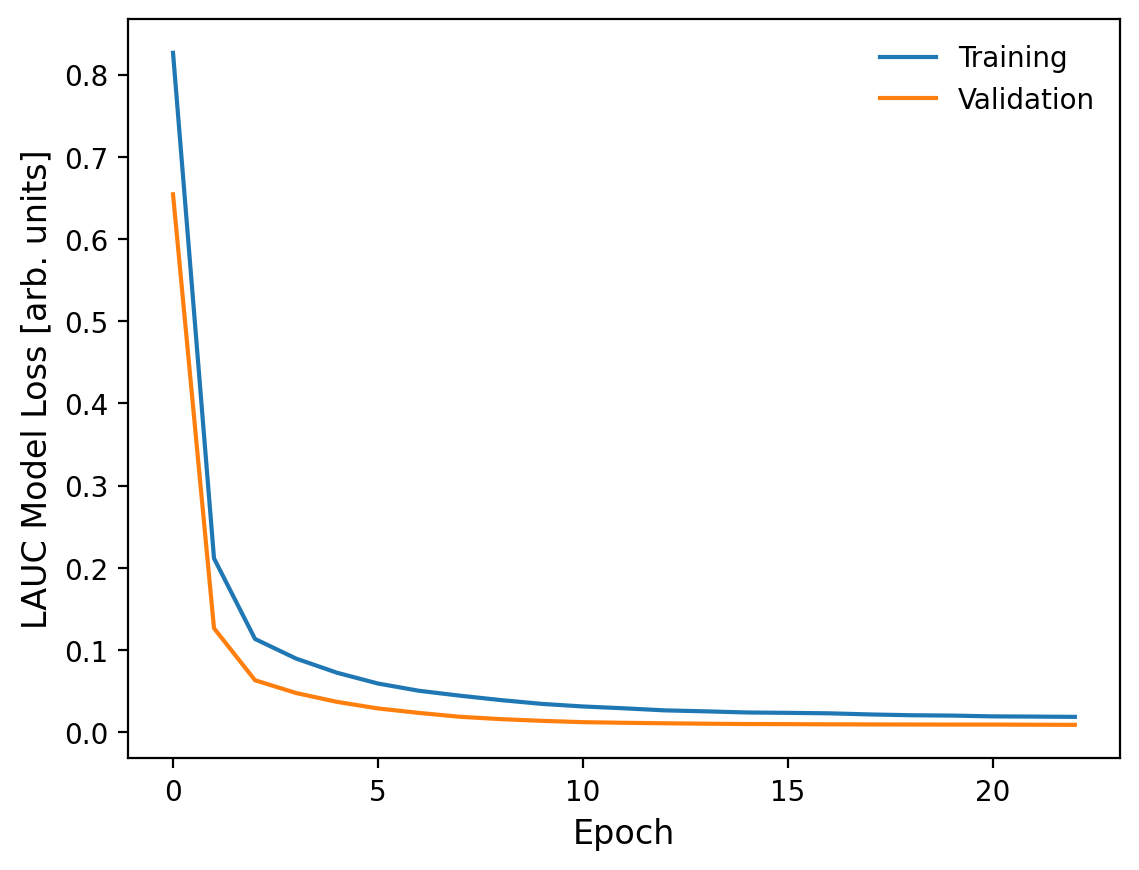

In [ ]:
plt.plot(train_losses_lauc, label='Training')
plt.plot(valid_losses_lauc, label='Validation')
plt.ylabel('LAUC Model Loss [arb. units]', size=12)
plt.xlabel('Epoch', size=12)
plt.legend(frameon=False)

In [ ]:
print(f"Best Valid Loss: {best_valid_loss:.6f}\nBest Train LAUC:  {best_train_lauc:.6f}\nBest Valid AUC:  {best_valid_auc:.6f}\nBest Valid LAUC: {best_valid_lauc:.6f}")

Best Valid Loss: 0.008833
Best Train LAUC:  0.927051
Best Valid AUC:  0.993790
Best Valid LAUC: 0.953831


### Save Models <font color='red'>(**Do Not Modify**)</font>

A common way to save a model is to serialize the internal state dictionary (containing the model parameters)

In [ ]:
laucModel = os.path.join(mdlPath, "model_best_valid_lauc."+str(num_hidden_units)+"nodes."+ data+".pt")
torch.save(model_dict["best_valid_lauc"].state_dict(), laucModel) # save the model
print(f'Best LAUC Model Saved Location: {laucModel}')

Best LAUC Model Saved Location: /content/drive/MyDrive/FICO Analytic Challenge/Model/model_best_valid_lauc.4nodes.Data.pt


In [ ]:
laucModel_train = os.path.join(mdlPath, "model_best_train_lauc."+str(num_hidden_units)+"nodes."+ data+".pt")
torch.save(model_dict["best_train_lauc"].state_dict(), laucModel_train) # save the model
print(f'Best LAUC Train Model Saved Location: {laucModel_train}')

Best LAUC Train Model Saved Location: /content/drive/MyDrive/FICO Analytic Challenge/Model/model_best_train_lauc.4nodes.Data.pt


In [ ]:
aucModel = os.path.join(mdlPath, "model_best_valid_auc."+str(num_hidden_units)+"nodes."+ data+".pt")
torch.save(model_dict["best_valid_auc"].state_dict(), aucModel) # save the model
print(f'Best AUC Model Saved Location: {aucModel}')

Best AUC Model Saved Location: /content/drive/MyDrive/FICO Analytic Challenge/Model/model_best_valid_auc.4nodes.Data.pt


In [ ]:
lossModel = os.path.join(mdlPath, "model_best_valid_loss."+str(num_hidden_units)+"nodes."+ data+".pt")
torch.save(model_dict["best_valid_loss"].state_dict(), lossModel) # save the model
print(f'Best Loss Model Saved Location: {lossModel}')

Best Loss Model Saved Location: /content/drive/MyDrive/FICO Analytic Challenge/Model/model_best_valid_loss.4nodes.Data.pt


In [ ]:
# These are the usual ipython objects
ipython_vars = ["In", "Out", "exit", "quit", "get_ipython", "ipython_vars"]

# Get a sorted list of the objects and their sizes
mem = {
    key: value
    for key, value in sorted(
        [
            (x, sys.getsizeof(globals().get(x)))
            for x in dir()
            if not x.startswith("_") and x not in sys.modules and x not in ipython_vars
        ],
        key=lambda x: x[1],
        reverse=True,
    )
}

total_mem_usage = sum(mem.values()) / (1024 ** 2)
print(f"Total Memory used by Notebook: {total_mem_usage:.2f} MB")

Total Memory used by Notebook: 2725.98 MB


### Predictions on Dataset using Trained Model <font color='red'>(**Do Not Modify**)</font>

Once the model is trained, we need to test is on a dataset that it hasn't seen, which we call the holdout set. The new dataset needs to be scaled to the trained model’s scaled dataset it was trained on. Once done, the process, where we use DataLoader to help process the data, and feed it to the imported model follows. Once done, the new dataset’s inputs (not the ones from DataLoader) need to be inverse_scaled back to their original values.

In [ ]:
# load the scaler
scaler = load(open(scaleFile, 'rb'))

# Load Dataset
#df_features_train = modify_df(trainFile, path, data)
#df_features_test = modify_df(testFile, path, data)
df_features_train = import_df(trainCSV)
df_features_test = import_df(testCSV)

# Scale dataset
df_features_train[feature_columns] = scaler.transform(df_features_train[feature_columns])
df_features_test[feature_columns] = scaler.transform(df_features_test[feature_columns])

In [ ]:
# Load Train set to Pytorch DataLoader
eval_dataset_train = MyDataset(df_features_train[feature_columns].values, df_features_train[label_column].values)
eval_loader_train = DataLoader(eval_dataset_train, batch_size=256, shuffle=False, drop_last=False)

# Load Test set to Pytorch DataLoader
eval_dataset_test = MyDataset(df_features_test[feature_columns].values, df_features_test[label_column].values)
eval_loader_test = DataLoader(eval_dataset_test, batch_size=256, shuffle=False, drop_last=False)

In [ ]:
# Import best LAUC Model
laucModel = os.path.join(mdlPath, "model_best_valid_lauc."+str(num_hidden_units)+"nodes."+ data+".pt")
model_l = NNet(input_size=len(feature_columns), hidden_units=num_hidden_units, output_size=1, dropout=dropout_rate)
model_l.load_state_dict(torch.load(laucModel))
model_l.to(device)
model_l.eval()

NNet(
  (inputLayer): Linear(in_features=40, out_features=4, bias=True)
  (hiddenLayer): Linear(in_features=4, out_features=4, bias=True)
  (outputLayer): Linear(in_features=4, out_features=1, bias=True)
  (batchNorm1): BatchNorm1d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchNorm2): BatchNorm1d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout1): Dropout(p=0.2, inplace=False)
  (dropout2): Dropout(p=0.2, inplace=False)
  (tanh): Tanh()
  (sigmoid): Sigmoid()
)

### Score outs <font color='red'>(**Do Not Modify**)</font>

The model outputs (or predictions) a probabilistic likelihood for each record, but that doesn't give us much information. The predicted values can range between $-\infty$ and $+\infty$, which isn't meaningful. After running data through the trained model, the next step is to take the predicted values and convert them to a scoring range between $1$ and $999$ and store them into a new column. These scores will be used in the metric calculations, which we'll talk more about next week.

In [ ]:
with torch.no_grad():
    # Train set
    infer_list_l = []
    for input_data, labels in eval_loader_train:
        output_l = model_l.forward(input_data.to(device))
        infer_list_l.append(output_l)

    df_features_train["y_preds"] = torch.concat(infer_list_l,axis=0).detach().numpy()

    # Test set
    infer_list_l = []
    for input_data, labels in eval_loader_test:
        output_l = model_l.forward(input_data.to(device))
        infer_list_l.append(output_l)

    df_features_test["y_preds"] = torch.concat(infer_list_l,axis=0).detach().numpy()

    # Scaling predictions to a scoreout range
    scaleMM = MinMaxScaler(feature_range=(1, 999))

    # Converting probabilites to logOdds to get a distribution about origin (0)
    # Train Set
    df_features_train['log_odds'] = df_features_train['y_preds'].apply(lambda p: np.log(0.99999/(1-0.99999)) if p == 1 else np.log(p/(1-p)))
    df_features_train['score'] = scaleMM.fit_transform(df_features_train['log_odds'].values[:, None]).astype(int)
    df_features_train.drop(columns=['log_odds'], inplace= True)

    # Test Set
    df_features_test['log_odds'] = df_features_test['y_preds'].apply(lambda p: np.log(0.99999/(1-0.99999)) if p == 1 else np.log(p/(1-p)))
    df_features_test['score'] = scaleMM.fit_transform(df_features_test['log_odds'].values[:, None]).astype(int)
    df_features_test.drop(columns=['log_odds'], inplace= True)

In [ ]:
# Apply inverse transformation for the input data
df_features_train[feature_columns] = scaler.inverse_transform(df_features_train[feature_columns])
df_features_test[feature_columns] = scaler.inverse_transform(df_features_test[feature_columns])

### Features to Save <font color='red'>(**Do Not Modify**)</font>

In [ ]:
# Features to save
saveFeatures = [*base_cols, *feature_columns, 'y_preds', 'score']
print(f"Features to save: {saveFeatures}")

Features to save: ['pan', 'merchant', 'category', 'transactionAmount', 'first', 'last', 'mdlIsFraudTrx', 'mdlIsFraudAcct', 'is_train', 'cardholderCountry', 'cardholderState', 'transactionDateTime', 'gender', 'street', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'merchCountry', 'merchState', 'deltaTime', '1m', 'AvgTransactionAmount_Last7Days', 'CNP_High', 'HighValue_International', 'IS_0_TO_5AM', 'IsHighValue', 'IsSpent', 'IsTransaction', 'Is_High_Low', 'RelativeAmount', 'amount_diff', 'amt_trend_24h', 'amt_trend_5e', 'average_spending', 'category_ratio', 'count_trend_1h', 'ewm_1D', 'high_interaction', 'is_cnp', 'is_grocery_pos', 'is_international', 'is_late_night', 'is_travel', 'monday_buy', 'num_hi_amt_last_hour', 'num_last_24_hours', 'outside_country', 'outside_state_purchase', 'ratio_14D_to_60D', 'ratio_30D_to_60D', 'repeat_amt', 'repeat_hi_amt_1H', 'rolling_mean_14D', 'rolling_mean_30D', 'rolling_mean_60D', 'spending_above_th

In [ ]:
df_features_train.columns

Index(['pan', 'merchant', 'category', 'transactionAmount', 'first', 'last',
       'mdlIsFraudTrx', 'mdlIsFraudAcct', 'is_train', 'cardholderCountry',
       'cardholderState', 'transactionDateTime', 'gender', 'street', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'merchCountry', 'merchState', 'deltaTime',
       '1m', 'AvgTransactionAmount_Last7Days', 'CNP_High',
       'HighValue_International', 'IS_0_TO_5AM', 'IsHighValue', 'IsSpent',
       'IsTransaction', 'Is_High_Low', 'RelativeAmount', 'amount_diff',
       'amt_trend_24h', 'amt_trend_5e', 'average_spending', 'category_ratio',
       'count_trend_1h', 'ewm_1D', 'high_interaction', 'is_cnp',
       'is_grocery_pos', 'is_international', 'is_late_night', 'is_travel',
       'monday_buy', 'num_hi_amt_last_hour', 'num_last_24_hours',
       'outside_country', 'outside_state_purchase', 'ratio_14D_to_60D',
       'ratio_30D_to_60D', 'repeat_amt', 'repeat_hi_amt_1H',

## Save Results to Output File <font color='red'>(**Do Not Modify**)</font>

In [ ]:
# eth_ars = ['first', 'last', 'gender', 'street', 'zip', 'city_pop', 'job', 'dob']
# saveFeatures = list(set(saveFeatures) - set(eth_ars))

In [ ]:
# Train set
df_features_train[saveFeatures].to_csv(trainsaveCSV, index=False)

# Test set
df_features_test[saveFeatures].to_csv(testsaveCSV, index=False)

## Exercises

1. Train a Neural Network model on the same variable set used for your Week 5 LogReg
	<ol type="a">
    <li>What is the best test LAUC? </li>
	<li>What was the train LAUC for this model?</li>
	<li>Plot the ROC on the train and test set and explain the results</li>
	</ol>

## Data Needed for ROC Plot <font color='red'>(**Do Not Modify**)</font>

In [ ]:
# # Data for ROC AUC comparison
# y_test_score = df_features_test[df_features_test['is_train'] == 0]['score']
# y_test = df_features_test[df_features_test['is_train'] == 0]['mdlIsFraudTrx']

# y_train_score = df_features_train[df_features_train['is_train'] == 1]['score']
# y_train = df_features_train[df_features_train['is_train'] == 1]['mdlIsFraudTrx']

In [ ]:
# Run the code below to produce the plot
#plotROC(y_train, y_train_score, y_test, y_test_score, trainFile[0], testFile[0])